In [1]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

sns.set(style="darkgrid", palette="Set2")

In [66]:
m = pl.read_csv("external_data/PRECISE2_metadata.tsv", separator="\t")
d = pl.read_csv("external_data/PRECISE2_counts.csv")
d

Geneid,ecoli_00178,ecoli_00188,ecoli_00825,ecoli_00057,ecoli_00471,ecoli_00215,ecoli_00270,ecoli_00100,ecoli_00019,ecoli_00837,ecoli_00005,ecoli_00726,ecoli_00033,ecoli_00227,ecoli_00260,ecoli_00042,ecoli_00187,ecoli_00286,ecoli_00306,ecoli_00762,ecoli_00072,ecoli_00134,ecoli_00613,ecoli_00032,ecoli_00563,ecoli_00330,ecoli_00123,ecoli_00749,ecoli_00658,ecoli_00289,ecoli_00086,ecoli_00435,ecoli_00535,ecoli_00119,ecoli_00181,ecoli_00400,…,ecoli_00448,ecoli_00368,ecoli_00586,ecoli_00374,ecoli_00098,ecoli_00647,ecoli_00093,ecoli_00004,ecoli_00425,ecoli_00013,ecoli_00399,ecoli_00517,ecoli_00063,ecoli_00699,ecoli_00834,ecoli_00300,ecoli_00777,ecoli_00172,ecoli_00445,ecoli_00084,ecoli_00221,ecoli_00625,ecoli_00067,ecoli_00641,ecoli_00609,ecoli_00302,ecoli_00074,ecoli_00393,ecoli_00800,ecoli_00195,ecoli_00265,ecoli_00037,ecoli_00419,ecoli_00567,ecoli_00784,ecoli_00544,ecoli_00338
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""b0001""",1033,64,1079,464,19,1515,52,761,13,477,651,0,8,484,328,99,81,294,73,1143,255,71,585,553,41,278,22,1180,13942,509,20,300,140,7,450,169,…,748,79,543,56,4,7597,74,60,227,75,84,188,114,4884,250,279,315,619,152,60,339,4356,45,4454,73,60,1455,258,435,363,372,5,238,677,101,48,385
"""b0002""",4831,47376,29852,4125,715,36396,13114,15639,3164,45157,37670,2,32386,18642,879,23258,45596,26190,21692,12426,5822,39559,42279,12496,376,78641,17497,18543,24982,50788,3918,13564,19194,18897,31252,6681,…,27448,1046,23677,768,920,24232,22661,62824,10912,13290,5633,31136,3114,22966,44921,20063,23391,23315,6261,36536,18926,44420,2014,41959,10337,18903,35932,16736,6609,34432,22045,7387,25654,32192,19660,1827,56611
"""b0003""",1216,14035,8113,1467,595,11199,5566,4338,1692,11223,13110,0,8808,5777,450,7669,13547,7903,7565,3999,1822,8452,11457,3877,284,23053,5081,4808,8195,14895,1872,4339,6068,5965,9064,2192,…,7334,346,6525,301,433,7503,6634,24740,3281,4951,1754,8096,995,6842,11068,5363,7096,6984,1674,7208,5686,11347,1066,11589,3150,4691,11215,4794,2414,10421,5903,2445,7398,7113,4766,719,16584
"""b0004""",1201,18761,10339,1528,658,14476,8043,5340,1342,14016,12802,3,8222,8237,533,7575,17399,11481,9548,6163,2528,10832,13217,4540,383,26664,5507,5846,9673,19520,1205,6593,7949,6817,13509,3259,…,10424,473,9550,444,470,8895,7814,15589,5512,4772,2440,8948,1361,9043,13844,7920,10424,9660,2189,8892,6734,13927,707,12847,3216,6161,10963,7401,2257,13940,6350,2886,12073,9795,7853,821,20620
"""b0005""",77,250,161,42,161,315,270,304,53,241,386,11,75,239,9,137,249,202,177,352,60,259,764,85,48,659,76,3813,872,421,27,218,304,100,350,128,…,199,104,393,146,13,456,205,159,185,85,103,527,47,480,269,175,575,197,84,255,170,599,47,427,211,183,264,233,69,315,101,34,348,424,295,98,257
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""b4399""",212,336,127,121,66,274,86,119,206,217,232,5,259,152,99,171,320,209,87,135,61,248,269,239,62,351,124,111,273,201,199,189,127,206,153,123,…,307,102,173,153,56,295,180,233,156,122,127,127,37,289,199,86,210,184,214,401,131,271,143,277,250,79,501,128,87,255,205,110,254,156,154,74,258
"""b4400""",90,141,48,51,14,108,43,29,83,71,75,2,105,75,41,40,130,73,44,81,16,35,246,46,34,150,37,64,119,71,83,77,89,48,46,55,…,88,47,75,67,9,124,61,96,46,25,44,91,23,77,60,35,86,59,69,52,38,72,27,76,203,36,86,44,45,101,112,30,44,130,16,50,90
"""b4401""",9583,12507,4117,1780,6416,7860,5796,1985,15762,6216,4503,3,6342,3537,3733,3742,12319,4386,3898,4094,1543,5276,8784,5333,5401,9312,4544,2587,4012,4073,3512,6102,8544,6936,4557,4094,…,6372,1835,7041,2476,2025,5438,4485,9075,5345,2886,3345,2748,431,5036,6275,3035,5538,4569,2681,3278,3511,8377,8355,8934,3749,4631,6842,3837,2234,4180,10014,5686,3679,540

In [76]:
# melt data
dm = d.melt(id_vars="Geneid", variable_name="Experiment", value_name="Gene_count")
dj = dm.join(m, on="Experiment")

cols = ['Experiment', 'Geneid', 'Gene_count', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

dj.select(cols)

Experiment,Geneid,Gene_count,study,condition_id,rep_id,creator,run_date,Strain Description,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,Growth Rate (1/hr)
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,i64,f64,f64
"""ecoli_00178""","""b0001""",1033,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0002""",4831,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0003""",1216,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0004""",1201,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0005""",77,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ecoli_00338""","""b4399""",258,"""OxyR ALE""","""oxyR_ale18_h2o2""",2,"""Amitesh Anand""","""3/8/19""","""Escherichia coli OxyR.18.39""","""M9""","""glucose(4)""","""NH4Cl(1)""","""O2""",null,"""H2O2(2mM)""",37,7.0,null
"""ecoli_00338""","""b4400""",90,"""OxyR ALE""","""oxyR_ale18_h2o2""",2,"""Amitesh Anand""","""3/8/19""","""Escherichia coli OxyR.18.39""","""M9""","""glucose(4)""","""NH4Cl(1)""","""O2""",null,"""H2O2(2mM)""",37,7.0,null
"""ecoli_00338""","""b4401""",3605,"""OxyR ALE""","""oxyR_ale18_h2o2""",2,"""Amitesh Anand""","""3/8/19""","""Escherichia coli OxyR.18.39""","""M9""","""glucose(4)""","""NH4Cl(1)""","""O2""",null,"""H2O2(2mM)""",37,7.0,null


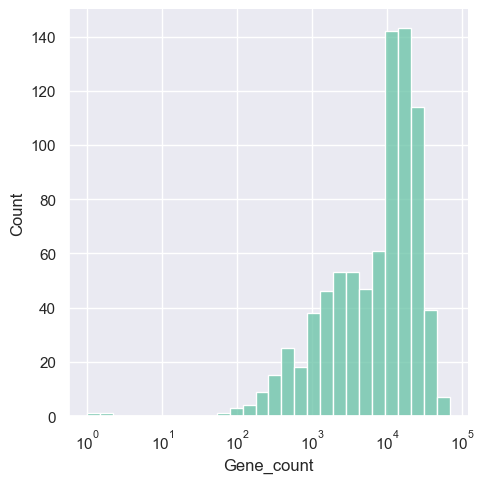

In [129]:
sns.displot(x='Gene_count', data = dj.filter(pl.col('Geneid')=='b2942').to_pandas(), 
            log_scale=[10,False],  common_norm=False, legend=True)

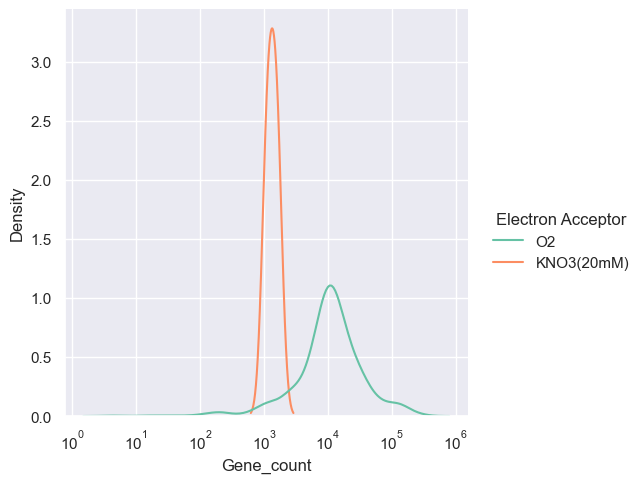

In [131]:
sns.displot(x='Gene_count', data = dj.filter(pl.col('Geneid')=='b3908').to_pandas(), 
            kind='kde', log_scale=[10,False], hue='Electron Acceptor', common_norm=False)

# Li 2014

In [17]:
li = pl.read_csv("external_data/Li_2014_profiling.csv")
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine
str,i64,i64,i64
"""aaeA""",62,5,21
"""aaeB""",16,2,0
"""aaeR""",203,79,141
"""aaeX""",28,5,11
"""aas""",188,80,162


In [18]:
li = li.with_columns( ( (pl.col("MOPS complete without methionine") + 10) / (10 + pl.col("MOPS complete"))).alias("dropout FC") )
li = li.with_columns( ( (pl.col("MOPS minimal") + 10) / (10 + pl.col("MOPS complete"))).alias("minimal FC") )
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""aaeA""",62,5,21,0.430556,0.208333
"""aaeB""",16,2,0,0.384615,0.461538
"""aaeR""",203,79,141,0.70892,0.41784
"""aaeX""",28,5,11,0.552632,0.394737
"""aas""",188,80,162,0.868687,0.454545


In [368]:
li.sort("dropout FC").tail(40)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""gsiB""",71,574,686,8.592593,7.209877
"""ilvX""",102,972,1022,9.214286,8.767857
"""iaaA""",74,257,809,9.75,3.178571
"""metL""",972,581,9779,9.968432,0.601833
"""metC""",596,1256,7277,12.024752,2.089109
"""cysM""",473,1411,5838,12.10766,2.942029
"""iraD""",7,44,218,13.411765,3.176471
"""yeeD""",477,2008,6555,13.480493,4.143737
"""znuA""",3453,25238,57733,16.674271,7.290788


In [20]:
li.sum()

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
null,18051444,5627623,10452920,9375.465686,6772.563954
